In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Loading Data**

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Getting to know the dataset**

In [6]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**EDA**

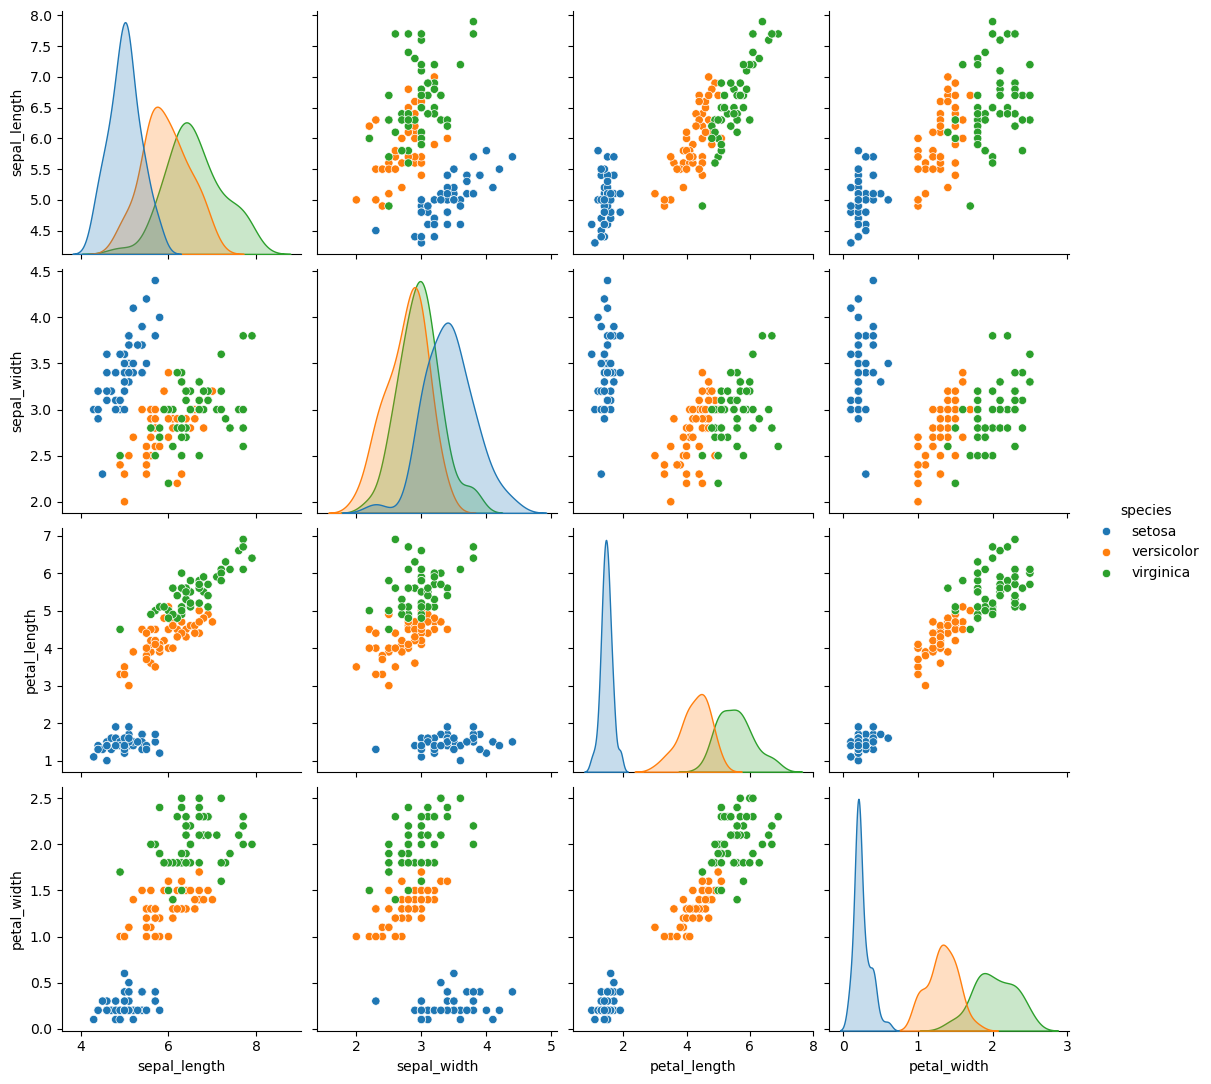

In [9]:
sns.pairplot(df,hue='species', height=2.75);

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df['species_num'] =df.species.map({'setosa':1,'versicolor':2,'virginica':3})

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


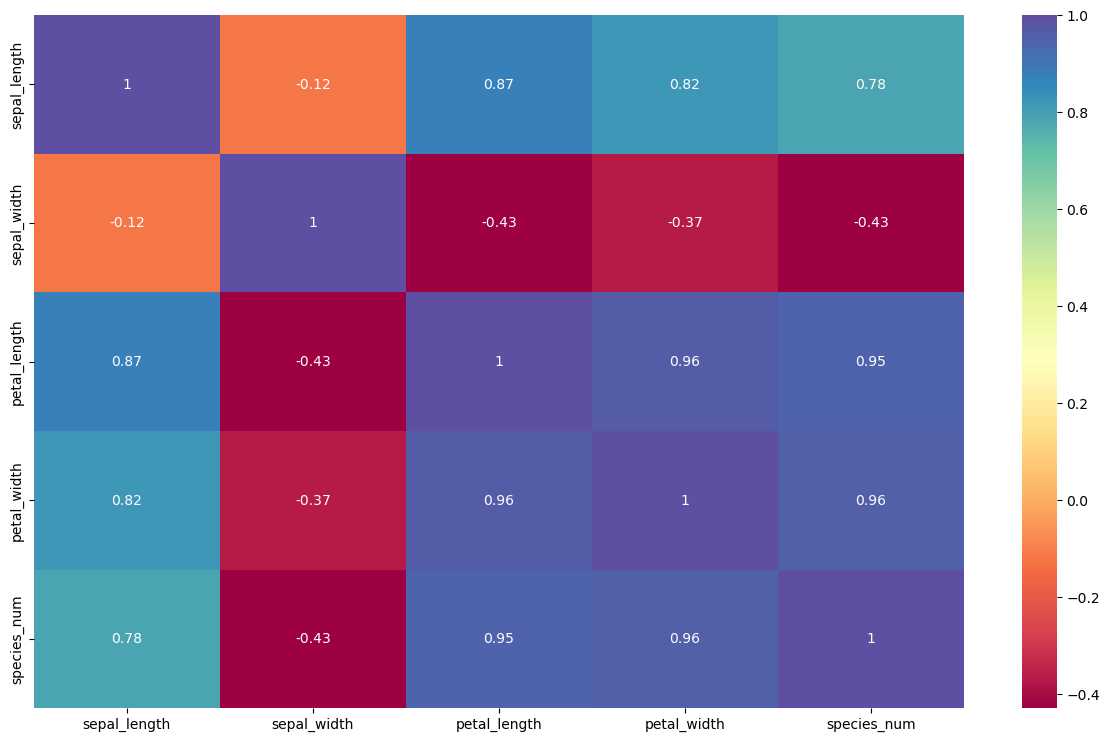

In [14]:
plt.figure(figsize=(15,9))
sns.heatmap(df.drop(['species'],axis=1).corr(),cmap='Spectral',annot=True);

In [15]:
# dropping petal length because of high correlation with petal width and since it is the least correlated with species
df.drop(['petal_length','species_num'],axis=1,inplace=True) 

In [16]:
df.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


##### Decision Tree is not an algorithm that depends on standardization so we can just proceed to modelling

**Decision Tree Modelling**

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
X = df.drop(['species'],axis=1)
y = df.species

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
dt_model = DecisionTreeClassifier()

In [24]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred = dt_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [27]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))

Accuracy Score:  0.9736842105263158


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_scores = cross_val_score(estimator=dt_model, X=X_train, y=y_train,cv=10)

In [30]:
cv_scores.mean()

0.8825757575757575

In [31]:
cm = confusion_matrix(y_test,y_pred)
xt = df.species.unique()
yt= df.species.unique()

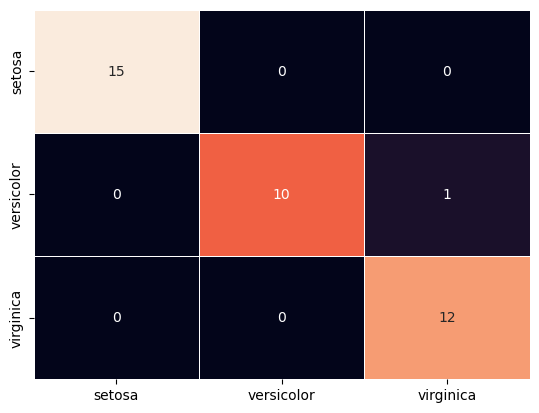

In [32]:
sns.heatmap(cm,
            #cmap='YlGnBu',
            annot=True,
            cbar=False,
            xticklabels=xt,
            yticklabels=yt,
            lw=.5);

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [34]:
from sklearn import tree

In [35]:
list(df.columns[:-1])

['sepal_length', 'sepal_width', 'petal_width']

In [36]:
features =  list(df.columns[:-1])
target = df.species.unique()
print(features)
print(target)

['sepal_length', 'sepal_width', 'petal_width']
['setosa' 'versicolor' 'virginica']


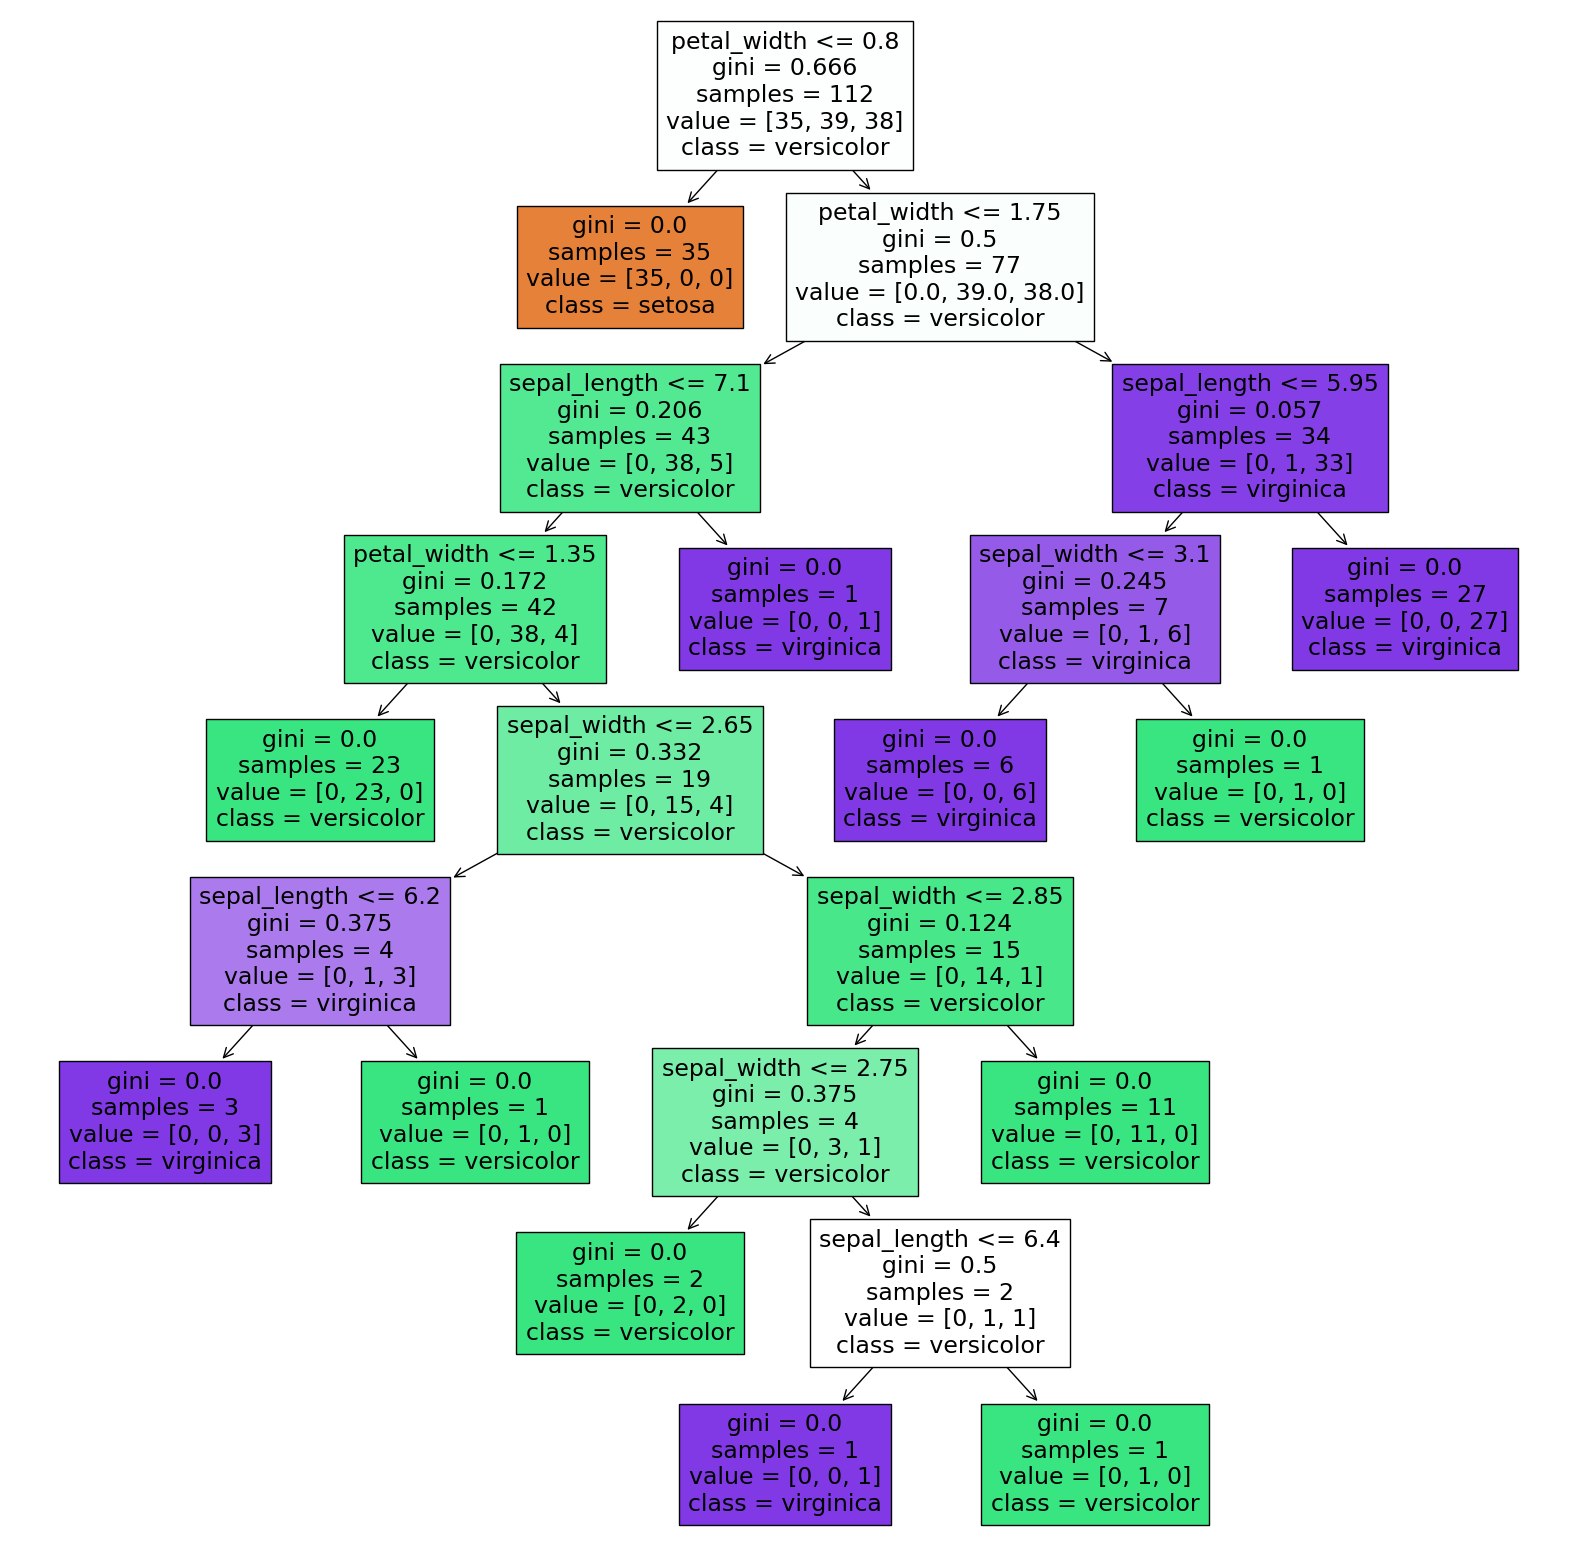

In [37]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dt_model, 
                       filled=True, 
                       feature_names=features,
                       class_names=target)

**Hyperparameter Optimization with python**

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
dt_model2 = DecisionTreeClassifier()

In [41]:
dt_params = {'criterion':['gini','entropy'],
             'max_depth': np.arange(0,14,2),
             'max_features':['auto','sqrt','log2']}

In [42]:
dt_cv_model = GridSearchCV(estimator=dt_model2,
                          param_grid=dt_params,
                          cv=10)

In [43]:
dt_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [44]:
dt_cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt'}

In [45]:
dt_tuned = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, max_features= 'log2')

In [46]:
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2')

In [47]:
y_pred = dt_tuned.predict(X_test)

In [48]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))

Accuracy Score:  0.868421052631579


In [49]:
cv_scores = cross_val_score(estimator=dt_tuned, X=X_train, y=y_train,cv=10)
cv_scores.mean()

0.8833333333333334

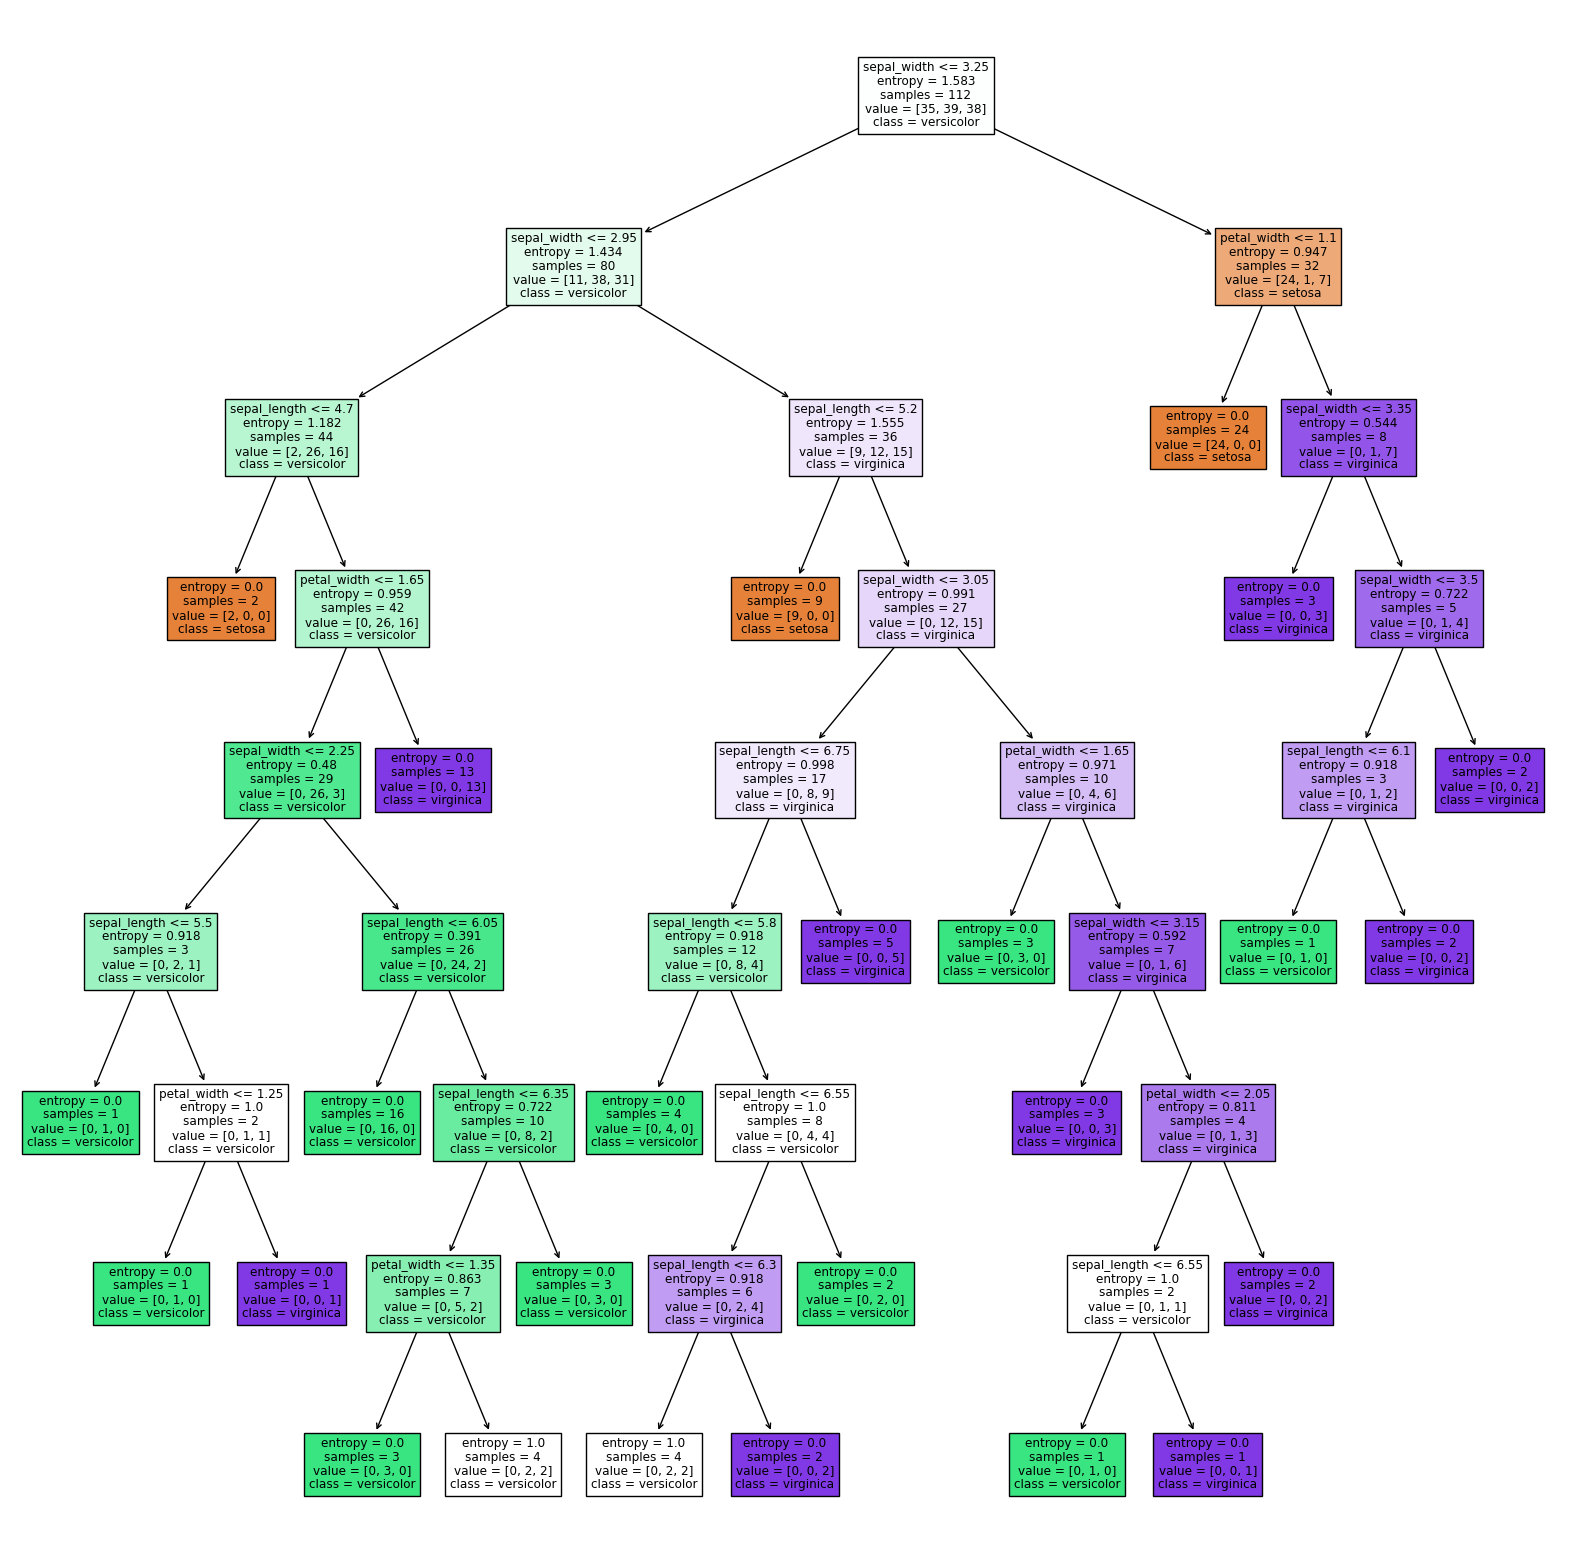

In [50]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dt_tuned, 
                       filled=True, 
                       feature_names=features,
                       class_names=target)